### Importamos las librerias que usaremos en el codigo

In [1]:
# Import the libraries to confirm they are installed 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Workshop is clean. Tools are sharp. Ready to work.")


Workshop is clean. Tools are sharp. Ready to work.


## Primeros pasos
- Convertir a data frame y analizar los datos

In [2]:
# Define the path to the dataset
# Using a variable makes the code cleaner and easier to modify later
file_path = 'data/housing.csv'

# Load the dataset into a pandas DataFrame
# The variable 'df' (short for DataFrame) is a standard convention
housing_df = pd.read_csv(file_path)

# --- INITIAL INSPECTION ---

# 1. Look at the first 5 rows to understand the columns and data format
print("--- First 5 Rows (head) ---")
print(housing_df.head())

# 2. Get a concise summary of the DataFrame
# This shows column data types, non-null values, and memory usage. It's our best tool for spotting missing data.
print("\n--- DataFrame Info ---")
housing_df.info()

# 3. Generate descriptive statistics for numerical columns
# This includes count, mean, standard deviation, min, max, and quartiles. Great for spotting outliers.
print("\n--- Descriptive Statistics (describe) ---")
print(housing_df.describe())

--- First 5 Rows (head) ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

--- DataFrame Info ---
<class 'pandas.core.fra

## Procedemos a la limpieza de datos, HANDLING MISSING VALUES



In [3]:

# 1. Calculate the median of the 'total_bedrooms' column.
# We choose the median because it is robust to outliers, which we suspect exist in this column.
median_total_bedrooms = housing_df['total_bedrooms'].median()
print(f"The calculated median for total_bedrooms is: {median_total_bedrooms}")

# 2. Impute (fill) the missing values in the 'total_bedrooms' column with the median.
# The 'inplace=True' argument modifies the DataFrame directly, without needing to reassign it.
# e.g., housing_df = housing_df.fillna(...)
housing_df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# --- VERIFICATION ---

# 3. Run .info() again to confirm that 'total_bedrooms' now has no missing values.
# The count for total_bedrooms should now match the other columns (20640 entries).
print("\n--- DataFrame Info After Imputation ---")
housing_df.info()

The calculated median for total_bedrooms is: 435.0

--- DataFrame Info After Imputation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\gatoh\AppData\Local\Temp\ipykernel_6120\2395341098.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


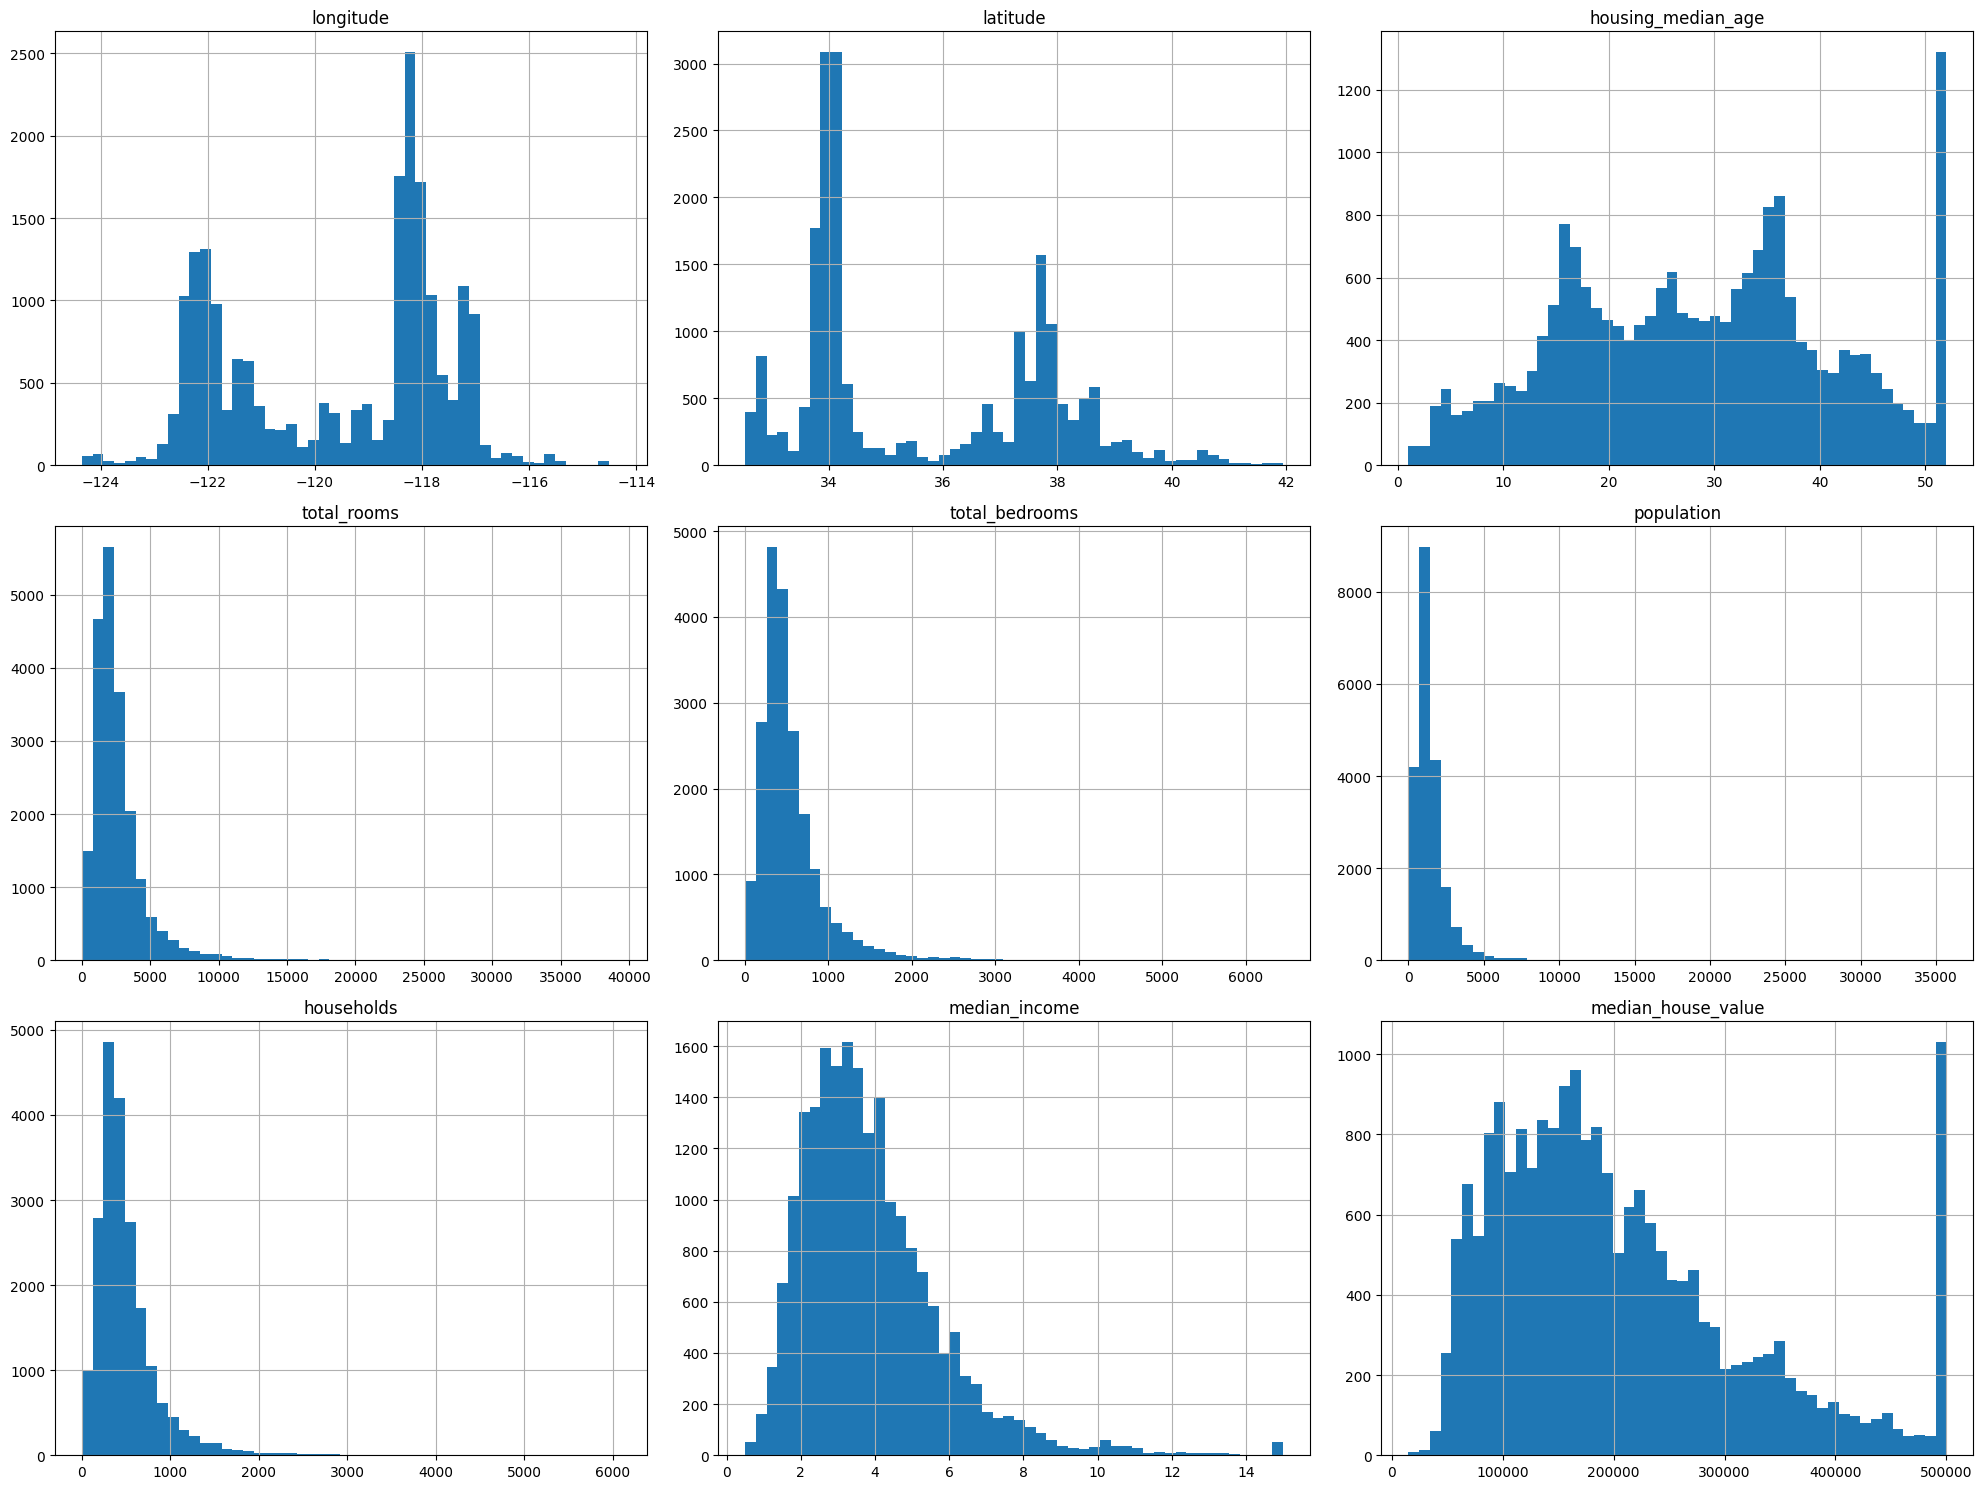

In [4]:
# --- VISUALIZATION: UNDERSTANDING FEATURE DISTRIBUTIONS ---

# We command pandas to generate a histogram for every single numerical column.
# 'figsize=(20,15)' makes the overall canvas large enough to see all the plots clearly.
# 'bins=50' tells each histogram to use 50 "buckets". This gives us a good level of detail.
housing_df.hist(bins=50, figsize=(20,15))

# This is a helper function to make sure the plots don't overlap.
plt.tight_layout()

# This command displays the final visual on the screen.
plt.show()

## Correlacion (+1 o -1)
Mathematically, the most common correlation is the Pearson Correlation Coefficient, denoted as r. It is a measure of the linear relationship between two variables, let's call them X and Y.

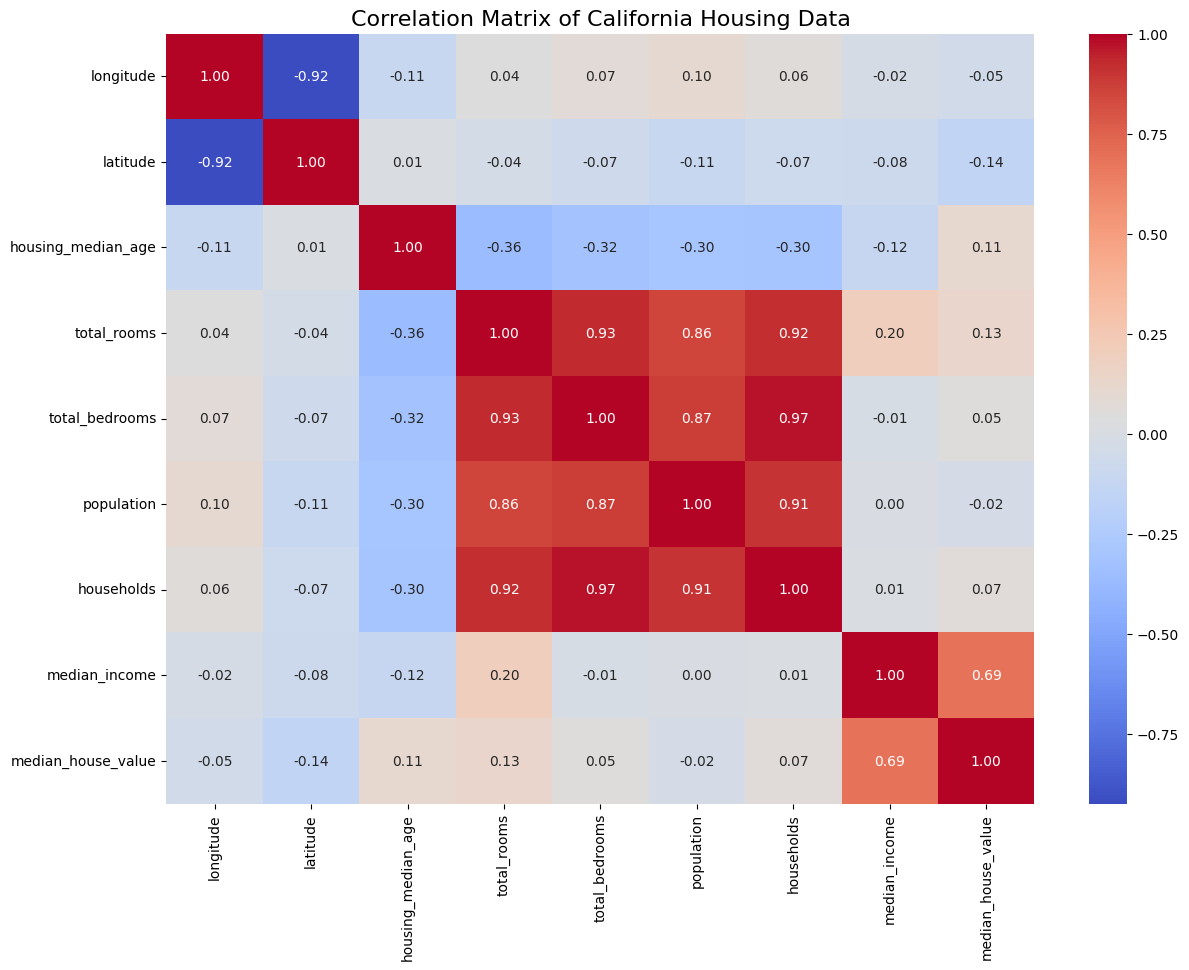


--- Correlation with Median House Value ---
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [5]:

# --- ANALYSIS: FINDING RELATIONSHIPS WITH CORRELATION ---

# 1. Calculate the correlation matrix for all numerical columns.
# Pandas' .corr() method does all the complex math we discussed automatically.
corr_matrix = housing_df.corr(numeric_only=True)

# 2. Set up the matplotlib figure to control the size of the heatmap.
plt.figure(figsize=(14, 10))

# 3. Generate the heatmap.
# - corr_matrix: The data for the heatmap.
# - annot=True: This writes the correlation number on each cell, which is crucial for detailed analysis.
# - cmap='coolwarm': This color map is intuitive. Warm colors (red) for positive correlation,
#   cool colors (blue) for negative correlation, and neutral for near-zero.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 4. Display the plot.
plt.title('Correlation Matrix of California Housing Data', fontsize=16)
plt.show()

# 5. For a more focused view, let's see which features correlate most with our target variable.
print("\n--- Correlation with Median House Value ---")
print(corr_matrix['median_house_value'].sort_values(ascending=False))

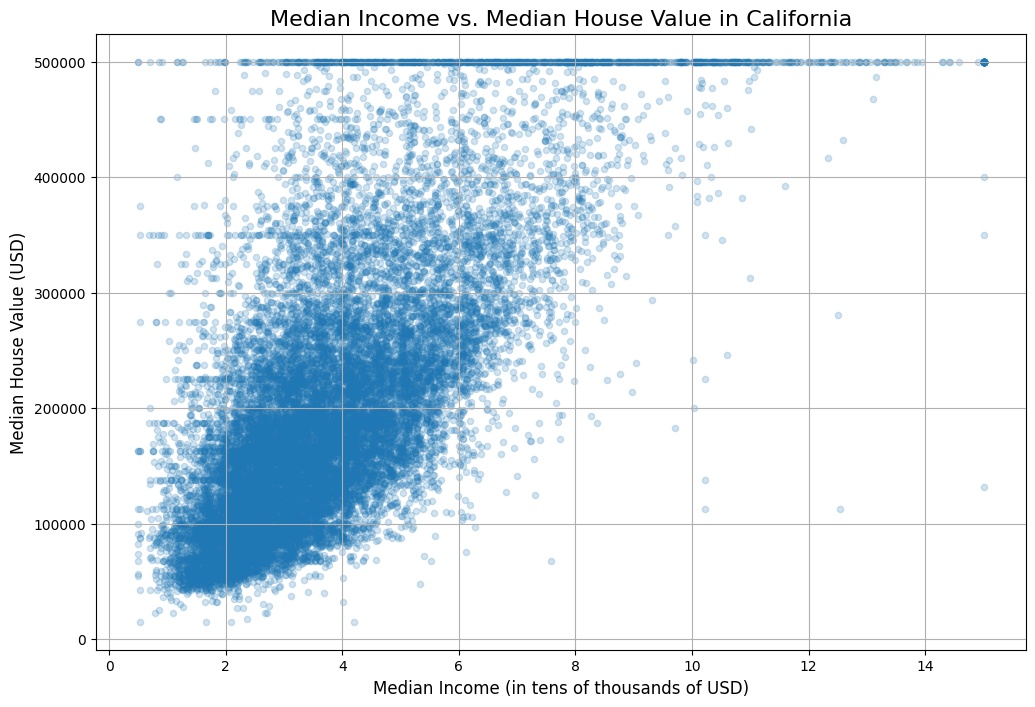

In [6]:
# --- DETAILED INVESTIGATION: SCATTER PLOT OF KEY RELATIONSHIP ---

# We'll use a scatter plot to visualize the relationship between the two most correlated variables.
# 'alpha=0.2' makes the points semi-transparent. This is crucial when you have many data points,
# as it helps to show areas of high density.

housing_df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(12, 8))

# Add labels and a title for clarity. This is a professional habit.
plt.title('Median Income vs. Median House Value in California', fontsize=16)
plt.xlabel('Median Income (in tens of thousands of USD)', fontsize=12)
plt.ylabel('Median House Value (USD)', fontsize=12)
plt.grid(True) # Add a grid for easier value reading

# Display the plot
plt.show()

### Key Insight: Median Income Is the Strongest Predictor of House Value

Notice that at the low-income end (left side), the points are tightly clustered vertically. At the high-income end (right side), the points are much more dispersed.

What this means: In low-income neighborhoods, housing prices are fairly predictable and don't vary much. However, in high-income neighborhoods, the price range is much wider. You can find both multimillion-dollar mansions and more modest homes in the same high-income area.

The technical term for this is "heteroscedasticity", and detecting it is the mark of a sharp analyst. It indicates that the relationship isn't perfectly uniform across the board.

In short, you have moved from analyzing a summary statistic (the 0.69 correlation) to analyzing the evidence itself. You have confirmed the main trend, identified a critical data cap (flaw), and discovered subtler patterns regarding density and variability. This is a complete and thorough analysis of this relationship.

#### Investigating the Categorical Feature (ocean_proximity)


In [7]:
# The .value_counts() method shows us the different categories and how many rows belong to each.
print("--- Categories in 'ocean_proximity' ---")
print(housing_df['ocean_proximity'].value_counts())

--- Categories in 'ocean_proximity' ---
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


### Creating more features (maybe we need them)
Based on our domain knowledge (thinking about what logically affects housing), we can combine some of our existing features to create new, more insightful ones.

Let's create three new, powerful features:

rooms_per_household: The total number of rooms in a neighborhood might be less important than the average number of rooms per household.

bedrooms_per_room: What proportion of rooms are bedrooms? This could be a proxy for housing type (e.g., family homes vs. studio apartments).

population_per_household: What is the average household size?

In [8]:
# --- FEATURE ENGINEERING: CREATING COMBINED ATTRIBUTES ---

# Create new, more meaningful features by combining existing ones.
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

# --- VERIFICATION ---

# Let's look at the correlation matrix again, now including our new features.
# This will tell us if our new features are better predictors of house value.
corr_matrix = housing_df.corr(numeric_only=True)
print("\n--- Correlation with Median House Value (After Feature Engineering) ---")
print(corr_matrix['median_house_value'].sort_values(ascending=False))


--- Correlation with Median House Value (After Feature Engineering) ---
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64


### Cleaning de ocean proximity data

In [9]:
# --- FEATURE PREPARATION: CONVERTING CATEGORICAL DATA TO NUMERICAL ---

# 1. Use pandas' get_dummies() function to perform One-Hot Encoding.
# This will create a new DataFrame with one column for each category.
ocean_proximity_dummies = pd.get_dummies(housing_df['ocean_proximity'], prefix='ocean')

# 2. Drop the original 'ocean_proximity' column, as we no longer need the text version.
housing_df = housing_df.drop('ocean_proximity', axis=1)

# 3. Concatenate the original DataFrame with the new dummy variables DataFrame.
# axis=1 means we are adding new columns.
housing_df = pd.concat([housing_df, ocean_proximity_dummies], axis=1)


# --- VERIFICATION ---
# Look at the first 5 rows again. You will see the new columns at the end.
print("--- DataFrame Head After One-Hot Encoding ---")
housing_df.head()

--- DataFrame Head After One-Hot Encoding ---


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,False,False,False,True,False


### GEOGRAPHICAL ANALYSIS: VISUALIZING LOCATION AND PRICE


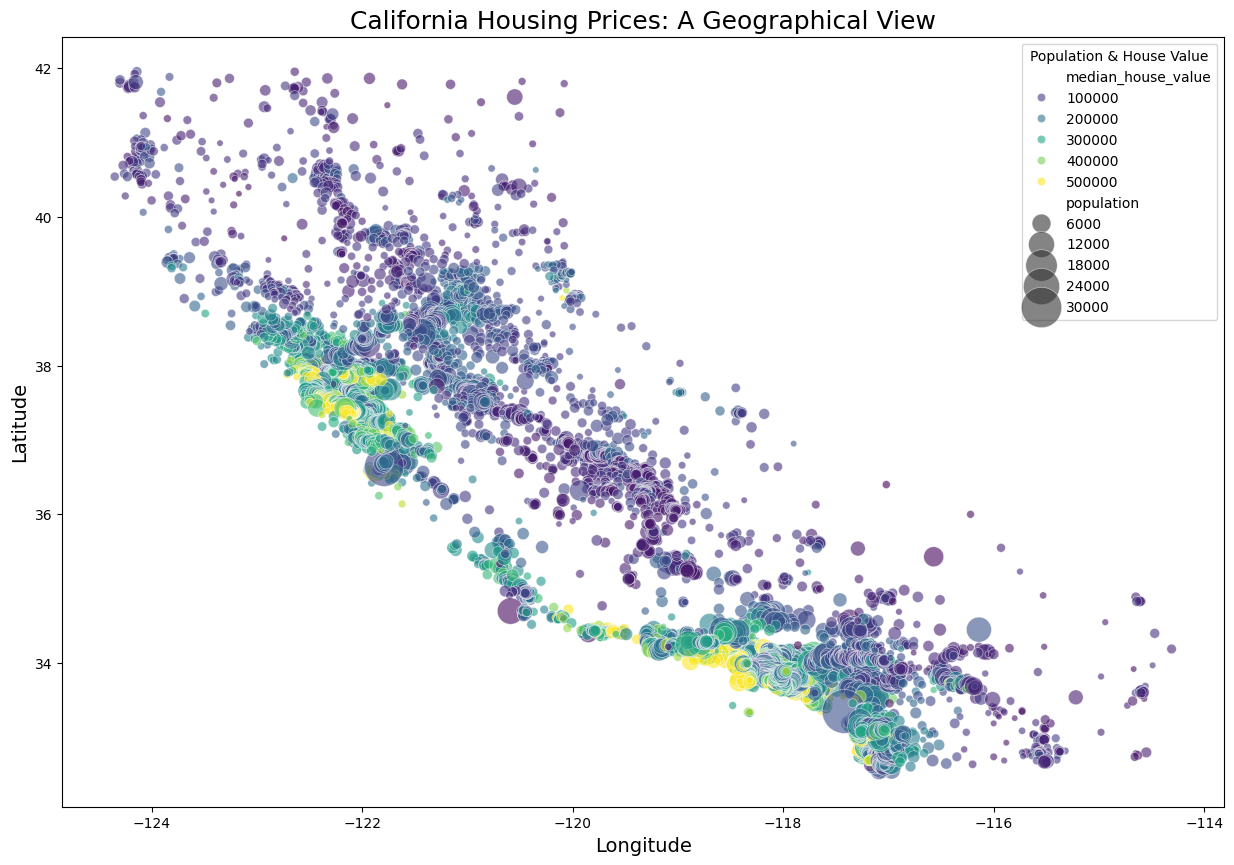

In [10]:
# Make sure our professional dark style is set


# Create the plot
plt.figure(figsize=(15, 10)) # It's better to create the figure first for more control
sns.scatterplot(
    data=housing_df,
    x="longitude",
    y="latitude",
    size=housing_df['population'], # Size of dots based on population
    sizes=(20, 1000),             # Range of dot sizes to make it look good
    hue="median_house_value",     # Color of dots based on price
    palette="viridis",            # A colorblind-friendly and visually appealing color map
    alpha=0.6                     # Good transparency
)

# Add title and labels
plt.title("California Housing Prices: A Geographical View", fontsize=18)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(title='Population & House Value') # Improve the legend

# Display the plot
plt.show()